In [1]:
from sklearn.datasets import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn # for plot styling
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import SpectralClustering
from pandas.plotting import scatter_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
import os

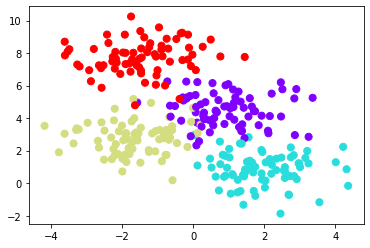

In [2]:
X, y = make_blobs(n_samples=300, centers=4,
random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


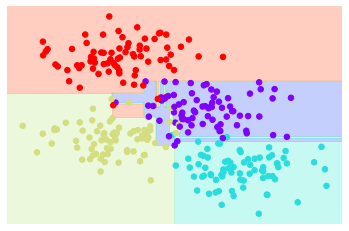

In [5]:
visualize_classifier(DecisionTreeClassifier(), X, y)


In [6]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes2.csv", header=None, names=col_names)
pima.index+=1
pima.head(5)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
Y = pima.label # Target variable

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


In [23]:
# Create Decision Tree classifer object
hiya = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=2) #pemilihan atribut dengan entropy dengan 
# Train Decision Tree Classifer
hiya = hiya.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = hiya.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9772727272727273


In [24]:
# Create Decision Tree classifer object
yuhu = DecisionTreeClassifier(criterion="entropy", max_depth=2) #pemilihan atribut dengan entropy max kedalaman 2


# Train Decision Tree Classifer
yuhu = yuhu.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = yuhu.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.987012987012987


In [13]:
colname =['Kehadiran','NH','UTS','UAS','Pengetahuan','Keterampilan','Total','Kelulusan']
# load dataset
data= pd.read_csv("datanilai3.csv", header=None, names=colname,sep=";")
data.index+=1
data.head(5)

,Kehadiran,NH,UTS,UAS,Pengetahuan,Keterampilan,Total,Kelulusan
1,38,91,84,76,84,56,82,1
2,39,65,85,76,73,55,77,0
3,40,63,80,78,72,97,81,1
4,40,74,80,78,77,81,81,1
5,40,72,82,76,76,95,82,1


In [14]:
#split dataset in features and target variable
featurecol = ['Kehadiran','NH','UTS','UAS','Pengetahuan','Keterampilan','Total']
X1 = data[featurecol] # Features
Y1 = data.Kelulusan # Target variable


In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=1) # 70% training and 30% test

In [16]:
# Create Decision Tree classifer object
bis = DecisionTreeClassifier()

# Train Decision Tree Classifer
bis= bis.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = bis.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


In [18]:
cool =['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','0oldpeak','slope','ca','thal','target']
# load dataset
jan= pd.read_csv("heartheart2.csv", header=None, names=cool,sep=";")
jan.index+=1
jan.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,0oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
#split dataset in features and target variable
fitur = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','0oldpeak','slope','ca','thal']
X2 = jan[fitur] # Features
Y2 = jan.target # Target variable

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.3, random_state=1) # 70% training and 30% test

In [21]:
# Create Decision Tree classifer object
holobis = DecisionTreeClassifier()

# Train Decision Tree Classifer
holobis= holobis.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = holobis.predict(X_test)

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9902597402597403
